In [1]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import torchvision.transforms as transforms

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

Defining the model

In [2]:
class Cifar10CnnModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),

            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 4 x 4

            nn.Flatten(),
            nn.Dropout(p=0.3),
            nn.Linear(128*4*4, 128),
            nn.ReLU(),
            nn.Linear(128, 10))
        
    def forward(self, xb):
        return self.network(xb)

Making list of the classes

In [3]:
classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [5]:
device=get_default_device()

In [6]:
print(device)

cpu


Loading the model

In [7]:
model = to_device(Cifar10CnnModel(), device)
model.load_state_dict(torch.load('/content/cifar10-cnn.pth',map_location=torch.device('cpu')))

<All keys matched successfully>

In [15]:
def predict_image(path, model):
    im=Image.open(path)
    # converting image to tensor
    transform = transforms.Compose([transforms.Resize((32,32)),transforms.ToTensor()]) 
    img=transform(im)
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    model.eval()
    with torch.no_grad():
        yb = model(xb)
    # Pick index with highest probability
    prob=nn.Softmax(dim=1)
    yb=prob(yb)
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    print('Predicted:',classes[preds[0].item()],' with a probability of',str(round(torch.max(yb).item(), 4)*100)+'%')
    plt.imshow(im)
    plt.show()

Predicted: airplane  with a probability of 97.53%


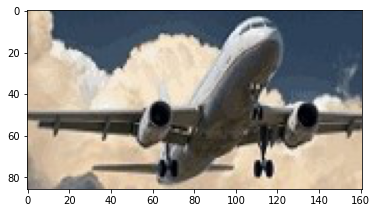

Predicted: ship  with a probability of 100.0%


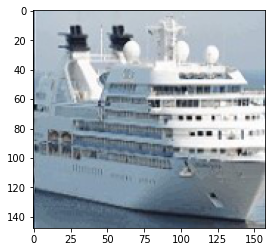

Predicted: horse  with a probability of 99.92999999999999%


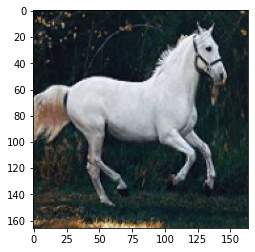

Predicted: deer  with a probability of 99.71%


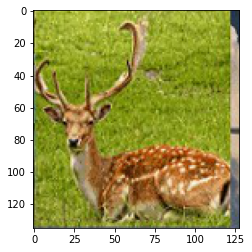

Predicted: frog  with a probability of 99.97%


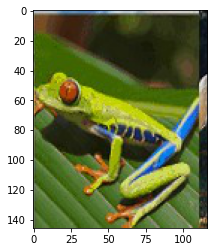

In [18]:
predict_image('/content/Screenshot-297.jpg', model)
predict_image('/content/Screenshot-296.jpg', model)
predict_image('/content/Screenshot-295.jpg', model)
predict_image('/content/Screenshot-298.jpg', model)
predict_image('/content/Screenshot-300.jpg', model)